<a href="https://colab.research.google.com/github/adhanush14/Bank/blob/adhanush14-patch-1/predecting__house_price_ipynb(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case:-Based on given features we need to Predict House Price. 

## Introduction:-
In this project, we will develop and evaluate the performance and the predictive power of a model trained and tested on data collected from houseprice data.

Once we get a good fit, we will use this model to predict the monetary value of a house.

A model like this would be very valuable for a real state agent who could make use of the information provided in a dayly basis.

In [ ]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter

In [ ]:
df1=pd.read_csv('data.csv') ##Reading the data set 


In [ ]:
#displaying max columns in data
pd.set_option('display.max_columns',None)

In [ ]:
#displaying max Row's in data
pd.set_option('display.max_rows',None)

# Exploratory Data Analysis (EDA) 

In [ ]:
df1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df1.shape

(1460, 81)

In [ ]:
## Getting all columns from the dataset 
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df1.describe(include=['O'])
## describe the dataset wich are having string datatype

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [ ]:
df1.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
## Univarent Analysis

In [ ]:
import sweetviz as sv
report=sv.analyze(df1)
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data Exploration:-
In this first section of this project, I will make a cursory investigation about the housing data and provide my observations.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features and the target variable.
The target variable"SalePrice" will be the variable we seek to predict. These are stored in features and prices,respectively.

In [ ]:
df1.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

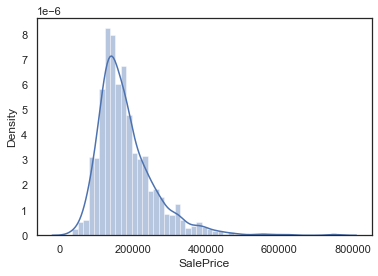

In [ ]:
sns.distplot(df1.SalePrice.dropna(axis=0))

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

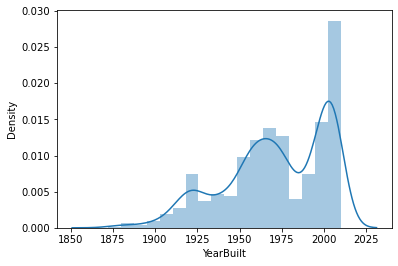

In [ ]:
sns.distplot(df1.YearBuilt.dropna(axis=0))

<AxesSubplot:xlabel='YrSold', ylabel='Density'>

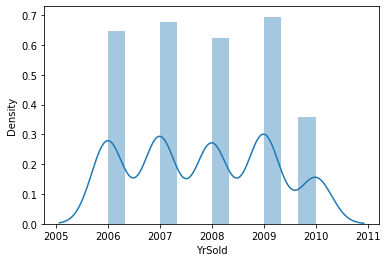

In [ ]:
sns.distplot(df1.YrSold.dropna(axis=0))

Comparesion with target varable is done in tableau,because we are having huge data with missing valuse, we can't visuvalize them by using the pandas or python. 

link:-
https://public.tableau.com/app/profile/dhanush.appala/viz/houseprice_16240022045300/Sheet

## Filling all missing values

In [ ]:
print(Counter(df1.LotFrontage))
##It is float data, having less no of null values(<50%) so replacing the null valuse by mean() 

Counter({60.0: 143, 70.0: 70, 80.0: 69, 50.0: 57, 75.0: 53, 65.0: 44, 85.0: 40, 78.0: 25, 21.0: 23, 90.0: 23, 68.0: 19, 24.0: 19, 64.0: 19, 73.0: 18, 72.0: 17, 63.0: 17, 55.0: 17, 79.0: 17, 100.0: 16, 51.0: 15, 66.0: 15, 74.0: 15, 52.0: 14, 59.0: 13, 57.0: 12, 40.0: 12, 82.0: 12, 71.0: 12, 67.0: 12, 43.0: 12, 76.0: 11, 69.0: 11, 34.0: 10, 88.0: 10, 92.0: 10, 86.0: 10, 53.0: 10, 84.0: 9, 44.0: 9, 77.0: 9, 62.0: 9, 35.0: 9, 98.0: 8, 61.0: 8, 93.0: 8, 96.0: 8, 95.0: 7, 120.0: 7, 107.0: 7, 58.0: 7, 91.0: 6, 110.0: 6, 48.0: 6, 89.0: 6, 81.0: 6, 105.0: 6, 94.0: 6, 54.0: 6, 41.0: 6, 30.0: 6, 36.0: 6, 47.0: 5, 32.0: 5, 83.0: 5, 37.0: 5, 87.0: 5, 56.0: 5, 49.0: 4, 102.0: 4, 42.0: 4, 108.0: 3, 99.0: 3, 103.0: 3, 130.0: 3, 45.0: 3, 104.0: 3, 101.0: 2, 115.0: 2, 121.0: 2, 122.0: 2, 134.0: 2, 97.0: 2, 174.0: 2, 129.0: 2, 118.0: 2, 116.0: 2, 109.0: 2, 114.0: 2, 313.0: 2, 124.0: 2, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 112.0: 1, nan: 1, nan: 1, 33.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 

In [ ]:
df1['LotFrontage']=df1['LotFrontage'].fillna(df1['LotFrontage'].mean())

In [ ]:
print(Counter(df1.Alley))

Counter({nan: 1369, 'Grvl': 50, 'Pave': 41})


### we are having more than 50% of missing values so we are droping the column

In [ ]:
df1.drop(['Alley'],axis=1,inplace=True)

In [ ]:
print(Counter(df1.BsmtQual))

Counter({'TA': 649, 'Gd': 618, 'Ex': 121, nan: 37, 'Fa': 35})


### Having less no of missing values so we treating the missing values by mode() because it is object datatype

In [ ]:
df1['BsmtQual']=df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0])


In [ ]:
print(Counter(df1.BsmtCond))

Counter({'TA': 1311, 'Gd': 65, 'Fa': 45, nan: 37, 'Po': 2})


## Filling the null values by mode()

In [ ]:
df1['BsmtCond']=df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0])



In [ ]:
print(Counter(df1.BsmtExposure))

Counter({'No': 953, 'Av': 221, 'Gd': 134, 'Mn': 114, nan: 38})


## Replacing the null value by mode() because it is object data

In [ ]:
df1['BsmtExposure']=df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0])

In [ ]:
print(Counter(df1.BsmtFinType1))
print(Counter(df1.BsmtFinType2))

Counter({'Unf': 430, 'GLQ': 418, 'ALQ': 220, 'BLQ': 148, 'Rec': 133, 'LwQ': 74, nan: 37})
Counter({'Unf': 1256, 'Rec': 54, 'LwQ': 46, nan: 38, 'BLQ': 33, 'ALQ': 19, 'GLQ': 14})


## filling the null valuse by mode()

In [ ]:
df1['BsmtFinType1']=df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0])
df1['BsmtFinType2']=df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0])

In [ ]:
print(Counter(df1.Electrical))

Counter({'SBrkr': 1334, 'FuseA': 94, 'FuseF': 27, 'FuseP': 3, 'Mix': 1, nan: 1})


In [ ]:
## having only 1 null value replacing it by mode
df1['Electrical']=df1['Electrical'].fillna(df1['Electrical'].mode()[0])

In [ ]:
print(Counter(df1.FireplaceQu))

Counter({nan: 690, 'Gd': 380, 'TA': 313, 'Fa': 33, 'Ex': 24, 'Po': 20})


In [ ]:
## fill the null valuse by mode()
df1['FireplaceQu']=df1['FireplaceQu'].fillna(df1['FireplaceQu'].mode()[0])

In [ ]:
print(Counter(df1.GarageType))

Counter({'Attchd': 870, 'Detchd': 387, 'BuiltIn': 88, nan: 81, 'Basment': 19, 'CarPort': 9, '2Types': 6})


In [ ]:
df1['GarageType']=df1['GarageType'].fillna(df1['GarageType'].mode()[0])

In [ ]:
print(Counter(df1.GarageYrBlt))

Counter({2005.0: 65, 2006.0: 59, 2004.0: 53, 2003.0: 50, 2007.0: 49, 1977.0: 35, 1998.0: 31, 1999.0: 30, 1976.0: 29, 2008.0: 29, 2000.0: 27, 2002.0: 26, 1968.0: 26, 1950.0: 24, 1993.0: 22, 1965.0: 21, 1962.0: 21, 1958.0: 21, 1966.0: 21, 2009.0: 21, 2001.0: 20, 1970.0: 20, 1957.0: 20, 1996.0: 20, 1960.0: 19, 1954.0: 19, 1997.0: 19, 1978.0: 19, 1995.0: 18, 1964.0: 18, 1974.0: 18, 1994.0: 18, 1959.0: 17, 1963.0: 16, 1990.0: 16, 1956.0: 16, 1967.0: 15, 1979.0: 15, 1969.0: 15, 1980.0: 15, 1973.0: 14, 1920.0: 14, 1988.0: 14, 1972.0: 14, 1940.0: 14, 1961.0: 13, 1971.0: 13, 1955.0: 13, 1992.0: 13, 1953.0: 12, 1987.0: 11, 1948.0: 11, 1985.0: 10, 1981.0: 10, 1989.0: 10, 1925.0: 10, 1941.0: 10, 1939.0: 9, 1991.0: 9, 1975.0: 9, 1930.0: 8, 1984.0: 8, 1949.0: 8, 1983.0: 7, 1951.0: 6, 1926.0: 6, 1986.0: 6, 1936.0: 5, 1916.0: 5, 1922.0: 5, 1931.0: 4, 1935.0: 4, 1945.0: 4, 1982.0: 4, 1928.0: 4, 1946.0: 4, 1921.0: 3, 1923.0: 3, 1932.0: 3, 1924.0: 3, 1910.0: 3, 2010.0: 3, 1938.0: 3, 1952.0: 3, 1915.0: 2,

In [ ]:
## replacing the null value

In [ ]:
df1['GarageYrBlt']=df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].mode()[0])
##df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [ ]:
print(Counter(df1.GarageFinish))
print(Counter(df1.GarageQual))

Counter({'Unf': 605, 'RFn': 422, 'Fin': 352, nan: 81})
Counter({'TA': 1311, nan: 81, 'Fa': 48, 'Gd': 14, 'Ex': 3, 'Po': 3})


In [ ]:
df1['GarageFinish']=df1['GarageFinish'].fillna(df1['GarageFinish'].mode()[0])
df1['GarageQual']=df1['GarageQual'].fillna(df1['GarageQual'].mode()[0])

In [ ]:
print(Counter(df1.GarageCond))

Counter({'TA': 1326, nan: 81, 'Fa': 35, 'Gd': 9, 'Po': 7, 'Ex': 2})


In [ ]:
df1['GarageCond']=df1['GarageCond'].fillna(df1['GarageCond'].mode()[0])

In [ ]:
print(Counter(df1.MasVnrType))

Counter({'None': 864, 'BrkFace': 445, 'Stone': 128, 'BrkCmn': 15, nan: 8})


In [ ]:
df1['MasVnrType']=df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0])


In [ ]:
df1['MasVnrArea']=df1['MasVnrArea'].fillna(df1['MasVnrArea'].mean())

In [ ]:
print(Counter(df1.PoolQC))
print(Counter(df1.Fence))
print(Counter(df1.MiscFeature))

Counter({nan: 1453, 'Gd': 3, 'Ex': 2, 'Fa': 2})
Counter({nan: 1179, 'MnPrv': 157, 'GdPrv': 59, 'GdWo': 54, 'MnWw': 11})
Counter({nan: 1406, 'Shed': 49, 'Gar2': 2, 'Othr': 2, 'TenC': 1})


In [ ]:
## All the 3 columns are having more than 90% of missing value so we are droping the columns.
## if we try to use mean or mode the target varable is effeted. ML can't predict the output ,Hence score decrease

In [ ]:
df1.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
df1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

# NO NULL VALUES 

In [ ]:
df1.shape

(1460, 77)

In [ ]:
df1.drop(['Id'],axis=1,inplace=True)


In [ ]:
df1.shape

(1460, 76)

In [ ]:
## creating all the catagerecal data in to list (cat_list) 
cat_list = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'] 
 

## Converting all catagerecal into numarecal data

In [ ]:
for col in cat_list:
    print(f'col: {col} unique values:')
    print(df1[col].unique())
    print()

col: MSZoning unique values:
['RL' 'RM' 'C (all)' 'FV' 'RH']

col: Street unique values:
['Pave' 'Grvl']

col: LotShape unique values:
['Reg' 'IR1' 'IR2' 'IR3']

col: LandContour unique values:
['Lvl' 'Bnk' 'Low' 'HLS']

col: Utilities unique values:
['AllPub' 'NoSeWa']

col: LotConfig unique values:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

col: LandSlope unique values:
['Gtl' 'Mod' 'Sev']

col: Neighborhood unique values:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

col: Condition1 unique values:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

col: Condition2 unique values:
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

col: BldgType unique values:
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

col: HouseStyle unique values:
['2Story' '1Story' '1.5Fin

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [ ]:
df1.MSZoning=label.fit_transform(df1.MSZoning)
df1.Street=label.fit_transform(df1.Street)
df1.LotShape=label.fit_transform(df1.LotShape)
df1.LandContour=label.fit_transform(df1.LandContour)
df1.Utilities=label.fit_transform(df1.Utilities)
df1.LotConfig=label.fit_transform(df1.LotConfig)
df1.LandSlope=label.fit_transform(df1.LandSlope)
df1.Neighborhood=label.fit_transform(df1.Neighborhood)
df1.BldgType=label.fit_transform(df1.BldgType)
df1.HouseStyle=label.fit_transform(df1.HouseStyle)
df1.RoofStyle=label.fit_transform(df1.RoofStyle)
df1.RoofMatl=label.fit_transform(df1.RoofMatl)
df1.MasVnrType=label.fit_transform(df1.MasVnrType)
df1.Foundation=label.fit_transform(df1.Foundation)
df1.BsmtQual=label.fit_transform(df1.BsmtQual)
df1.BsmtCond=label.fit_transform(df1.BsmtCond)
df1.BsmtExposure=label.fit_transform(df1.BsmtExposure)
df1.Heating=label.fit_transform(df1.Heating)
df1.HeatingQC=label.fit_transform(df1.HeatingQC)
df1.CentralAir=label.fit_transform(df1.CentralAir)
df1.Electrical=label.fit_transform(df1.Electrical)
df1.KitchenQual=label.fit_transform(df1.KitchenQual)
df1.Functional=label.fit_transform(df1.Functional)
df1.FireplaceQu=label.fit_transform(df1.FireplaceQu)
df1.GarageType=label.fit_transform(df1.GarageType)
df1.GarageFinish=label.fit_transform(df1.GarageFinish)
df1.GarageQual=label.fit_transform(df1.GarageQual)
df1.GarageCond=label.fit_transform(df1.GarageCond)
df1.PavedDrive=label.fit_transform(df1.PavedDrive)
df1.SaleType=label.fit_transform(df1.SaleType)
df1.SaleCondition=label.fit_transform(df1.SaleCondition)



In [ ]:
for col in cat_list:
    print(f'col: {col} unique values:')
    print(df1[col].unique())
    print()

col: MSZoning unique values:
[3 4 0 1 2]

col: Street unique values:
[1 0]

col: LotShape unique values:
[3 0 1 2]

col: LandContour unique values:
[3 0 2 1]

col: Utilities unique values:
[0 1]

col: LotConfig unique values:
[4 2 0 1 3]

col: LandSlope unique values:
[0 1 2]

col: Neighborhood unique values:
[ 5 24  6 15 11 21 14 17  3 19 16 12 20  9 10  7 23  8 22  4 13  0  2 18
  1]

col: Condition1 unique values:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

col: Condition2 unique values:
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

col: BldgType unique values:
[0 1 2 4 3]

col: HouseStyle unique values:
[5 2 0 1 6 7 4 3]

col: RoofStyle unique values:
[1 3 2 4 0 5]

col: RoofMatl unique values:
[1 7 3 6 2 5 4 0]

col: Exterior1st unique values:
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

col: Exterior2nd unique values:
['VinylSd' 'Metal

In [ ]:
df2=df1

In [ ]:
df1.Condition1=df1.Condition1.map({'Norm':0, 'Feedr':1, 'PosN':2, 'Artery':3, 'RRAe' :4,'RRNn':5, 'RRAn':6, 'PosA':7, 'RRNe':8})


In [ ]:
df1.Condition2=df1.Condition2.map({'Norm':0, 'Feedr':1, 'PosN':2, 'Artery':3, 'RRAe' :4,'RRNn':5, 'RRAn':6, 'PosA':7, 'RRNe':8})

In [ ]:
df1.Exterior1st=df1.Exterior1st.map({'VinylSd':0, 'MetalSd':1, 'Wd Sdng':2, 'HdBoard':3, 'BrkFace' :4,'WdShing':5, 'CemntBd':6,'Plywood':7, 'AsbShng':8, 'Stucco':9, 'BrkComm':10, 'AsphShn':11,'Stone':12, 'ImStucc':13,'CBlock':14})


In [ ]:
df1.Exterior2nd=df1.Exterior2nd.map({'VinylSd':0,'MetalSd':1,'Wd Shng':2,'HdBoard':3,'Plywood':4,'Wd Sdng':5,'CmentBd':6,'BrkFace':7, 'Stucco':8,'AsbShng':9,'Brk Cmn':10, 'ImStucc':11, 'AsphShn':12, 'Stone':13,'Other':14, 'CBlock':15})

In [ ]:
df1.ExterQual=df1.ExterQual.map({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})



In [ ]:
df1.ExterCond=df1.ExterCond.map({'TA':1,'Gd':0,'Fa':3,'Po':4,'Ex':2})


In [ ]:
df1.BsmtFinType1=df1.BsmtFinType1.map({'GLQ':0,'ALQ':1,'Unf':2,'Rec':3,'BLQ':4,'LwQ':5})


In [ ]:
df1.BsmtFinType2=df1.BsmtFinType2.map({'Unf':2,'BLQ':4,'ALQ':1,'Rec':3,'LwQ':5 ,'GLQ':0})


## Converting the Float into int

In [ ]:
df1['LotFrontage'] = df1['LotFrontage'].fillna(0).astype(int)
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(0).astype(int)
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna(0).astype(int)

<AxesSubplot:>

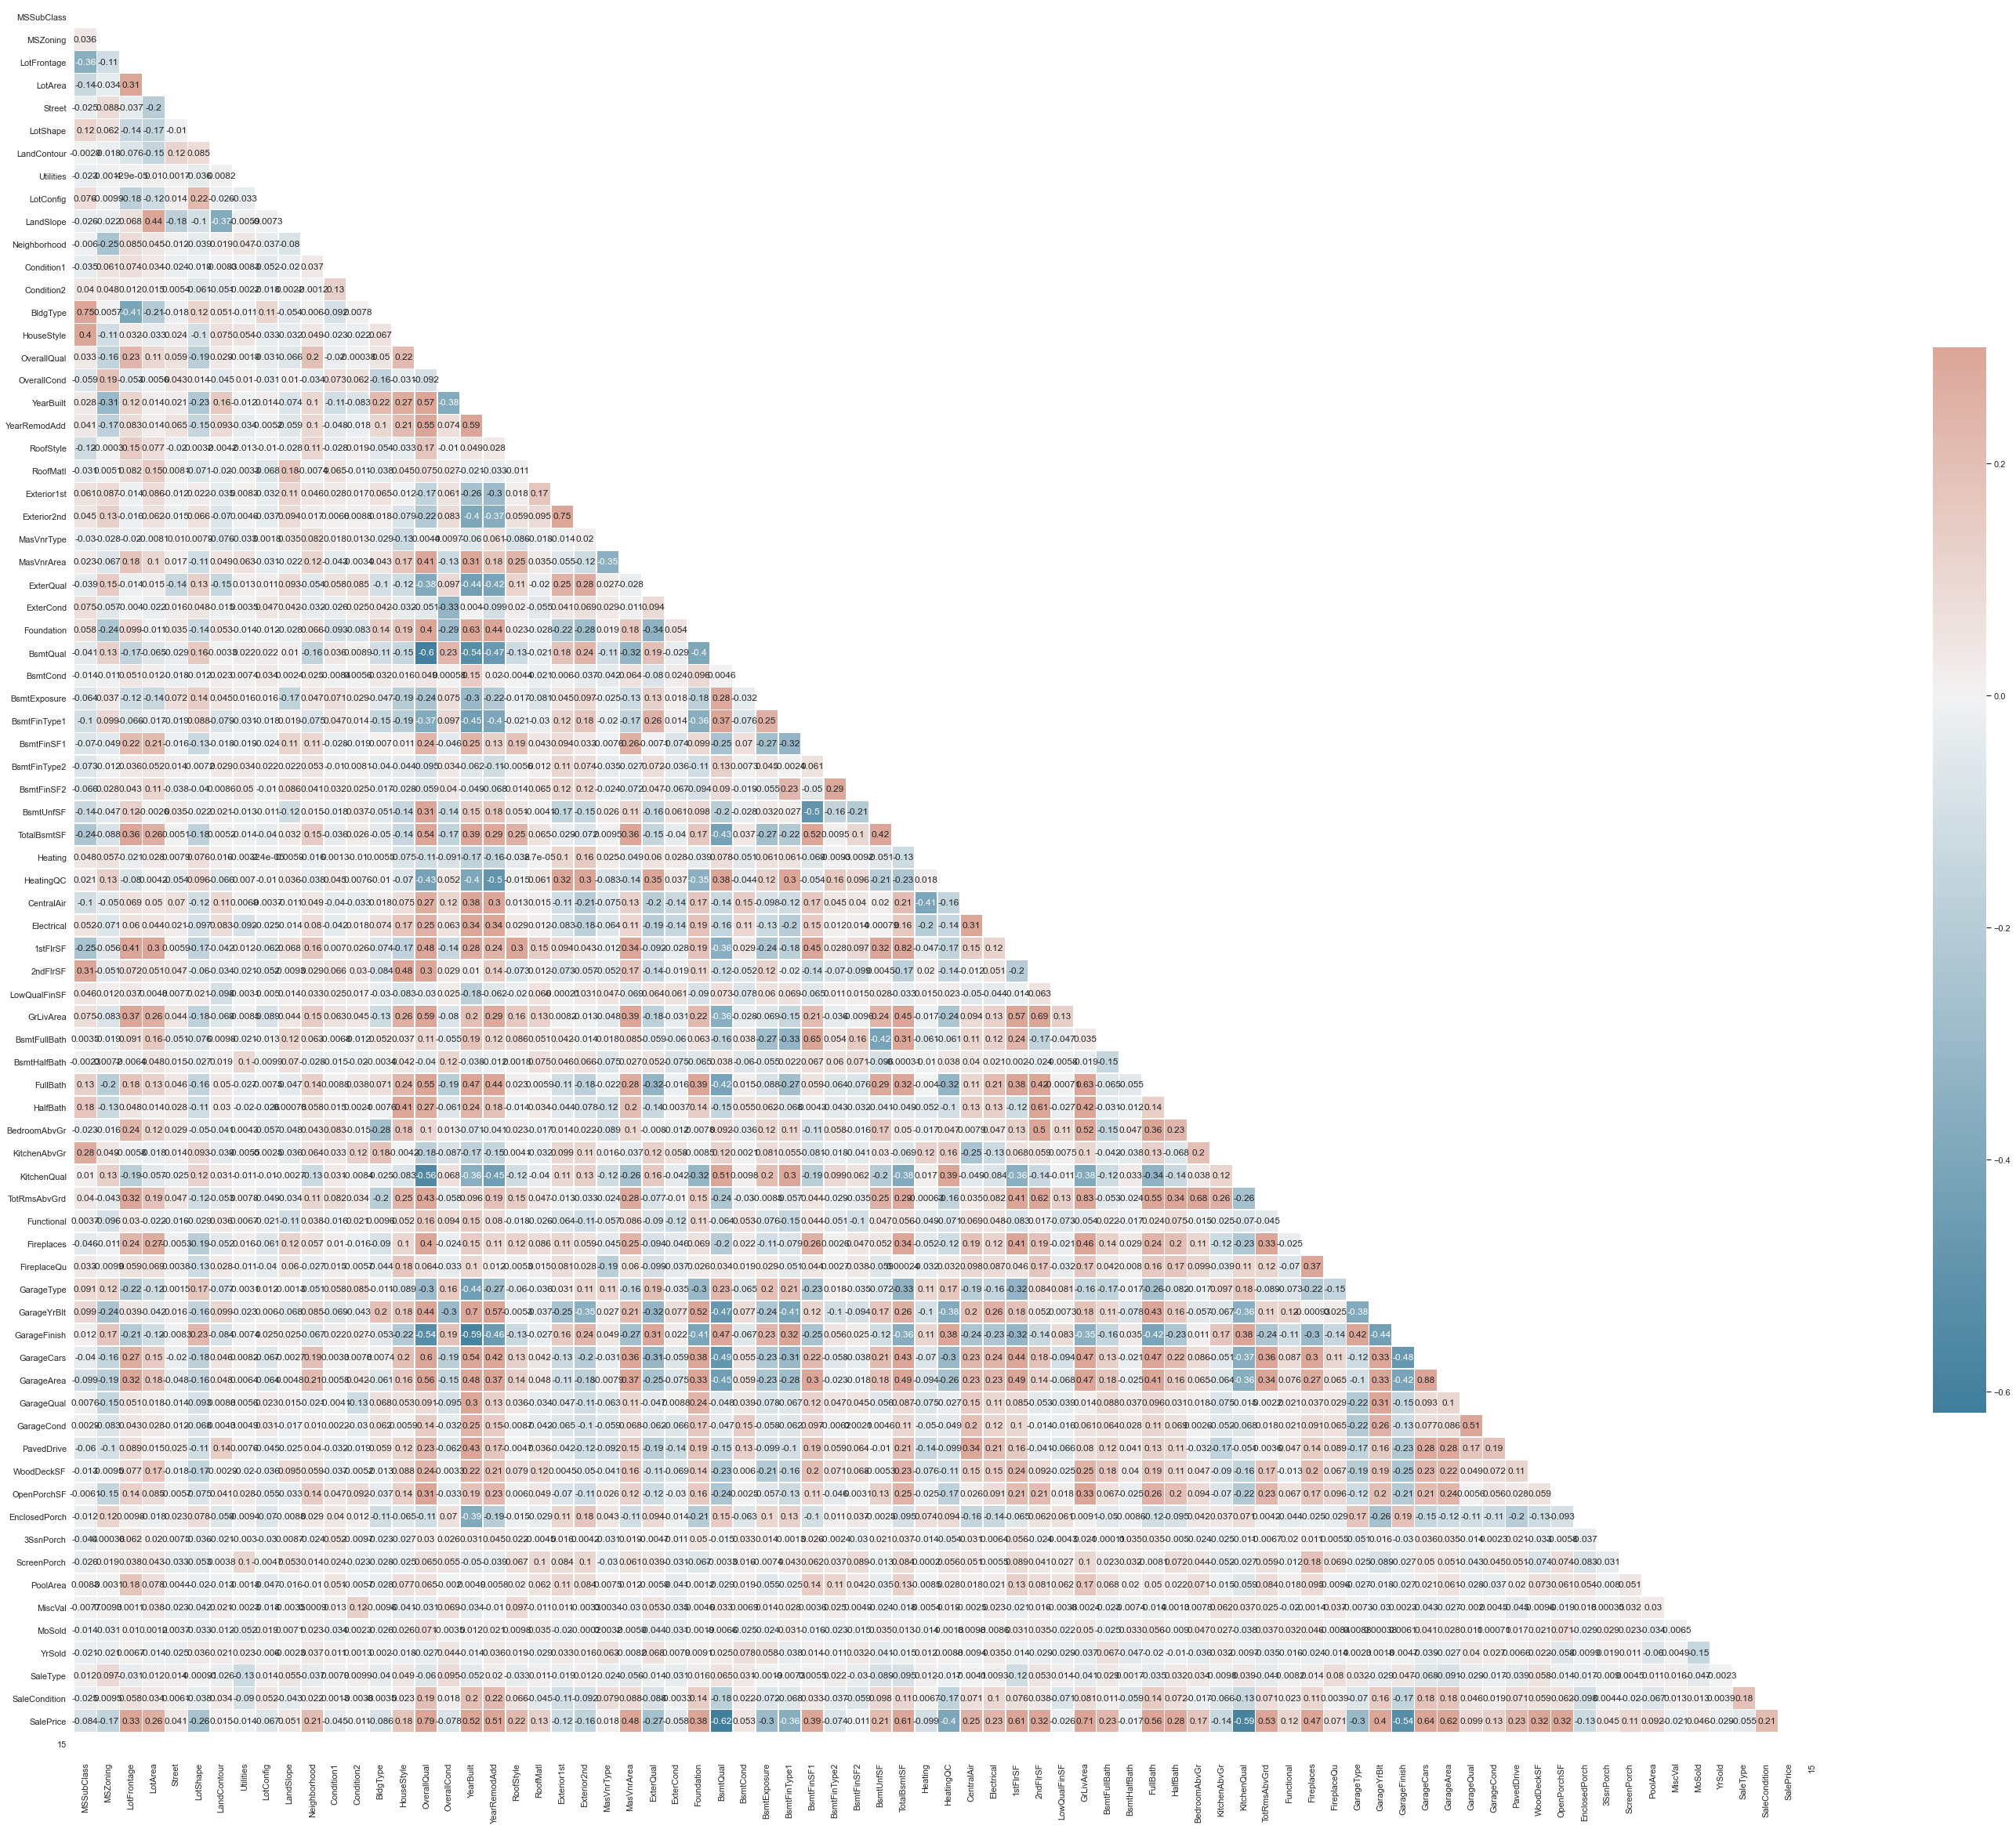

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50,50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<AxesSubplot:>

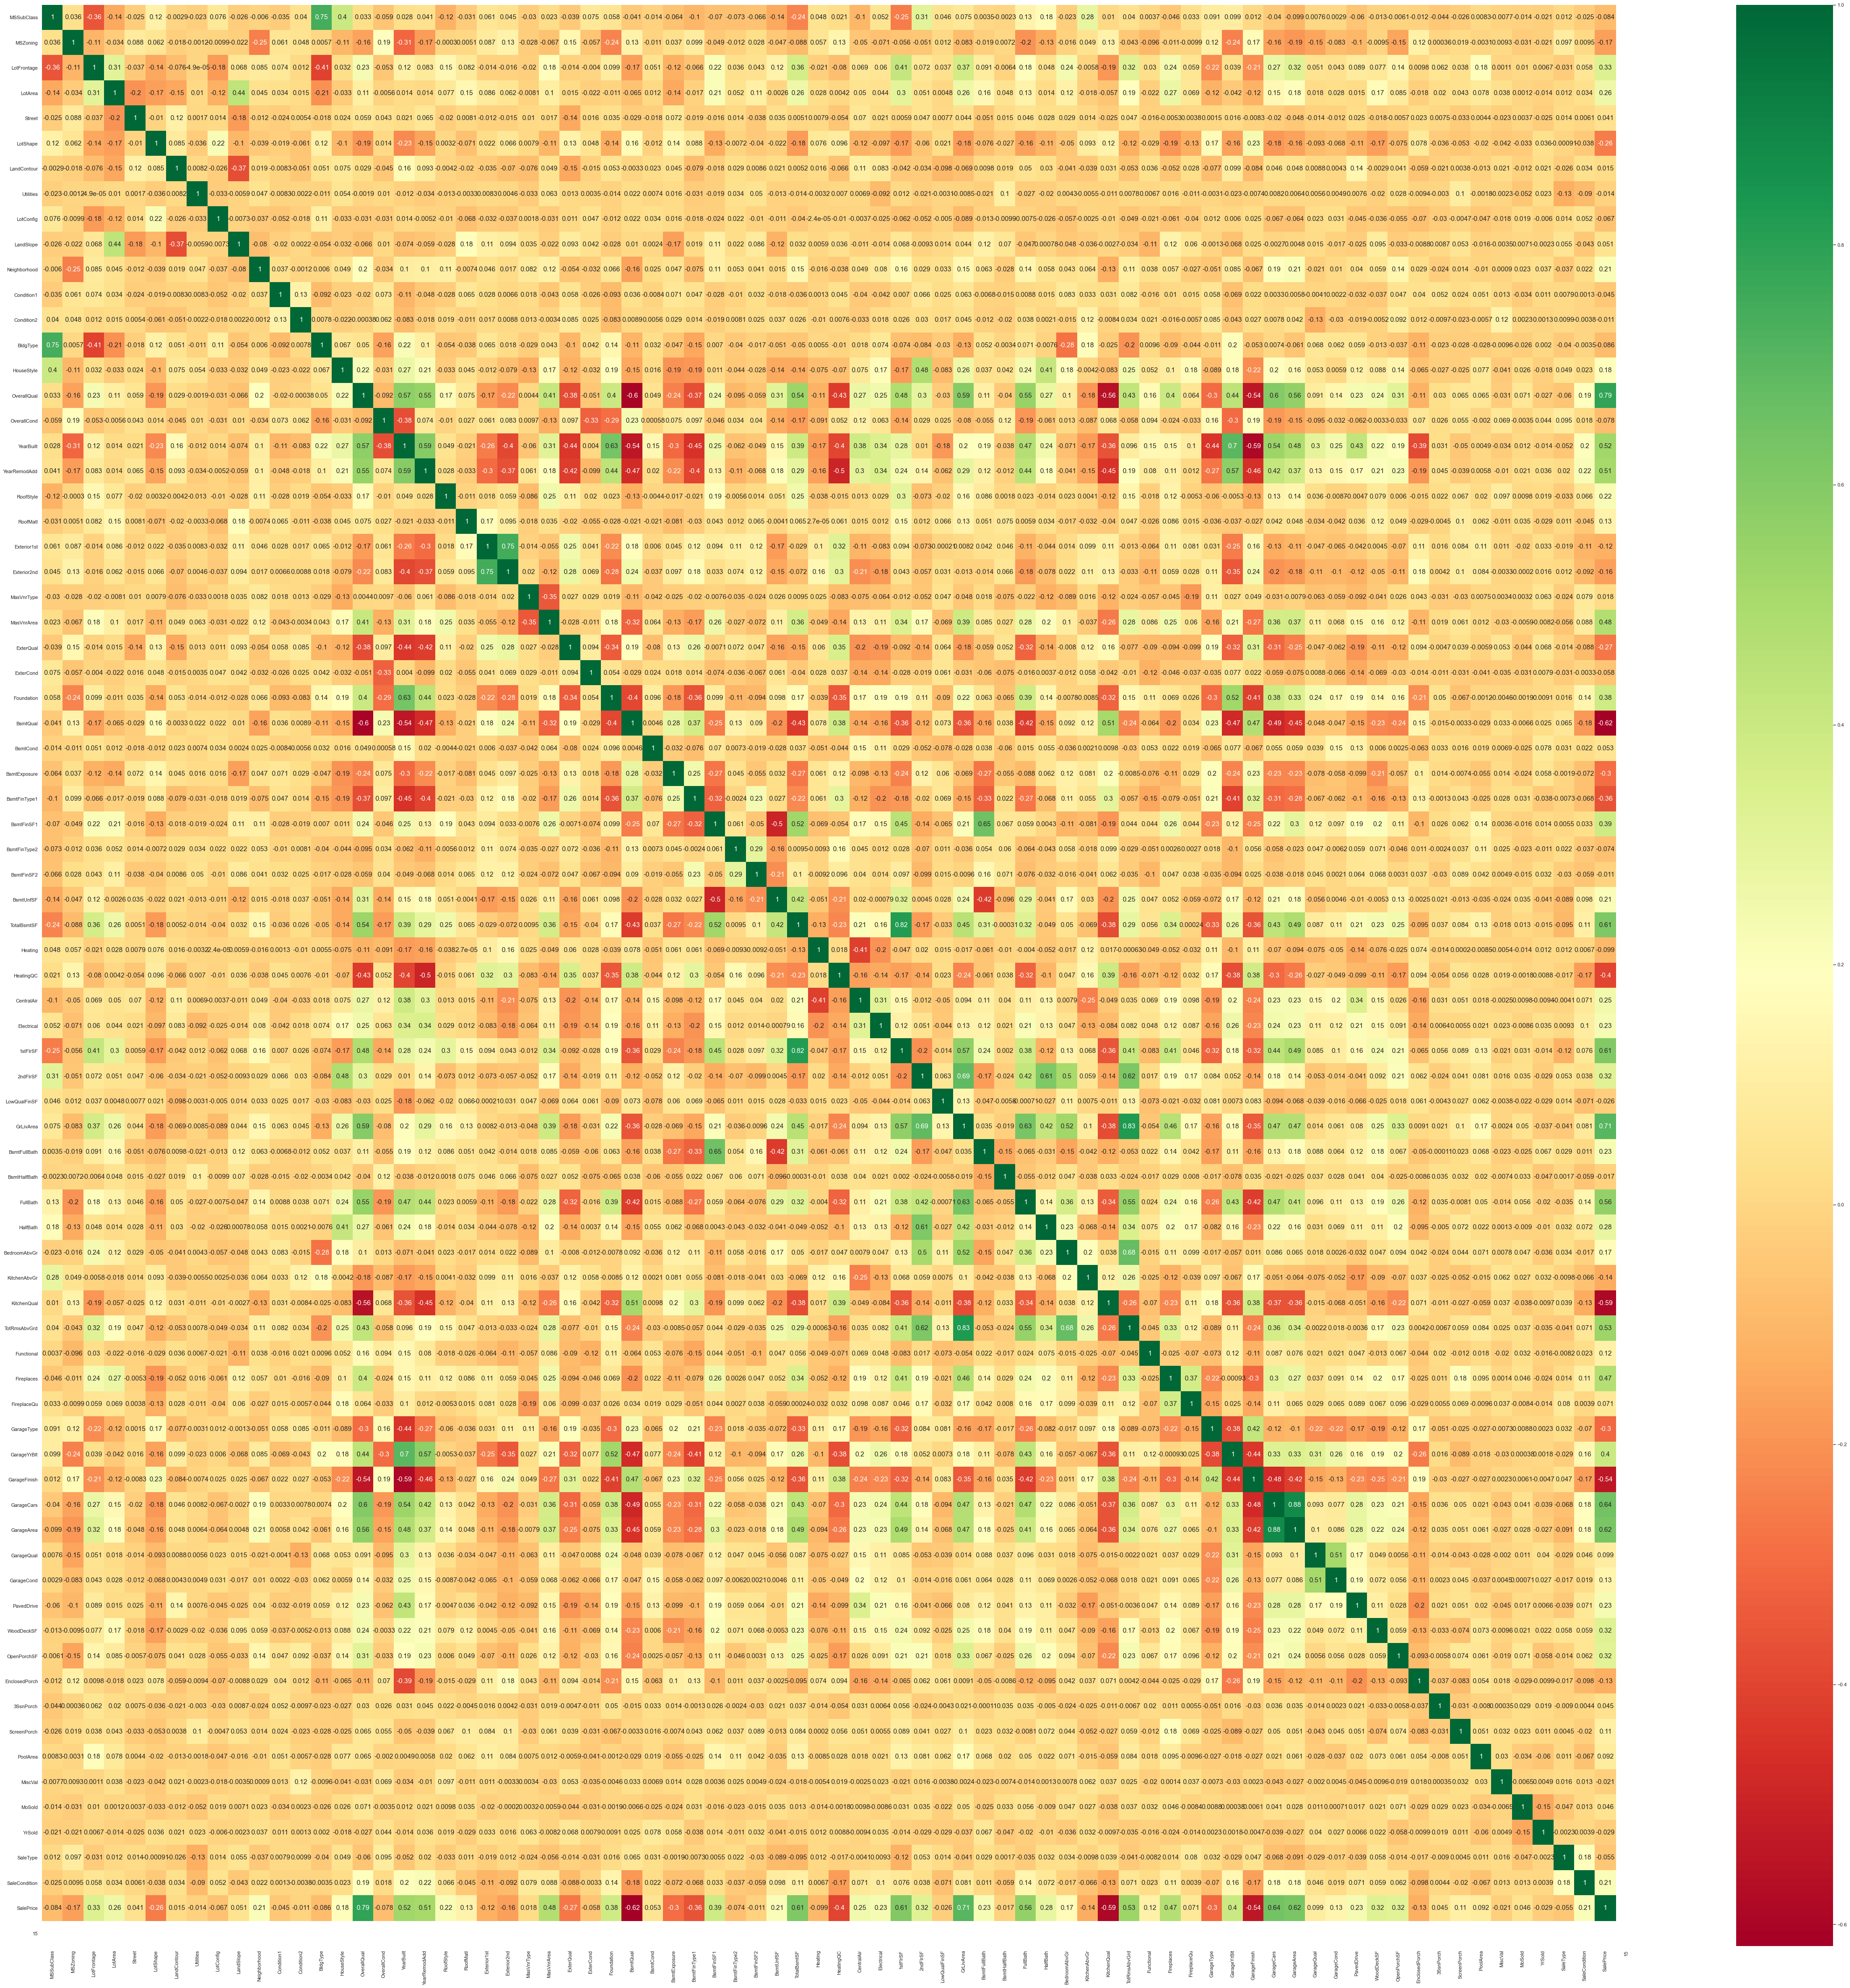

In [ ]:
## Checking correlation
plt.figure(figsize=(80,80))
sns.heatmap(df1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

### Developing a Model:-
In this second section of the project, I will develop techniques necessary for a model to make a prediction. 
Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to predict the house price.

In [ ]:
## Defining X and y and creating dependent and independent variables
X = df1.iloc[:,:-1] ## independent variable
y = df1['SalePrice'] ## Dependent or target variable

In [ ]:
X.head(1)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3           65     8450       1         3            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           0           0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5            7            5       2003          2003   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1            0            0           1         196   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          0          1           2         2         3             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             0         706             2           0        150          856   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          0           1           4       856       854   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            2             8           6   

   Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0           0            2           1         2003             1           2   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         548           4           4           2           0           61   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   

   SaleType  SaleCondition  
0         8              4

In [ ]:
y.tail(3)

1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64

In [ ]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1095, 75)
(365, 75)


Training and Testing

The benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm.

It is useful to evaluate our model once it is trained. We want to know if it has learned properly from a training split of the data.


## Evalauting the model
Applying the Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)
y_hat=model1.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score,classification_report,f1_score
##Training score
y_train_predict=model1.predict(X_train)
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

1.0

In [ ]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

       34900       1.00      1.00      1.00         1
       37900       1.00      1.00      1.00         1
       39300       1.00      1.00      1.00         1
       52000       1.00      1.00      1.00         1
       52500       1.00      1.00      1.00         1
       55000       1.00      1.00      1.00         2
       58500       1.00      1.00      1.00         1
       60000       1.00      1.00      1.00         2
       61000       1.00      1.00      1.00         1
       62383       1.00      1.00      1.00         1
       72500       1.00      1.00      1.00         1
       73000       1.00      1.00      1.00         1
       76000       1.00      1.00      1.00         1
       76500       1.00      1.00      1.00         1
       78000       1.00      1.00      1.00         1
       79000       1.00      1.00      1.00         2
       79900       1.00      1.00      1.00         2
       80000       1.00    

In [ ]:
## test acc
test_acc=accuracy_score(y_test,y_hat)
test_acc

0.0027397260273972603

Applying the Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict=rf_clf.predict(X_test)

In [ ]:
## from sklearn.metrics import accuracy_score,classification_report,f1_score

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       37900       0.00      0.00      0.00         0
       40000       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       79000       0.00      0.00      0.00         1
       79500       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         0
       81000       0.00    

C:\Users\chira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chira\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
pred_final = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, pred_final))

695770703.064707


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression


creating & Implementing the model 

In [ ]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()

In [ ]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

In [ ]:
pred_final = (pred_1+pred_2+pred_3)/3.0

In [ ]:
print(mean_squared_error(y_test, pred_final))

668792256.6102386


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
print(lin_reg.intercept_)


529784.2867579908


In [ ]:
# calculate Coefficient for x 
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
MSSubClass    -1.457467e+02
MSZoning      -3.952779e+03
LotFrontage   -2.291056e+02
LotArea        2.612928e-01
Street         1.634240e+04
LotShape      -1.283003e+03
LandContour    4.505730e+03
Utilities     -5.462246e+04
LotConfig     -5.108982e+02
LandSlope      1.544444e+04
Neighborhood   4.557350e+02
Condition1    -3.261194e+03
Condition2    -7.373247e+03
BldgType      -1.717994e+03
HouseStyle    -1.739035e+03
OverallQual    1.185017e+04
OverallCond    4.929269e+03
YearBuilt      2.660557e+02
YearRemodAdd   5.105309e+01
RoofStyle      2.796140e+03
RoofMatl       5.335609e+03
Exterior1st   -2.157195e+03
Exterior2nd    1.972456e+03
MasVnrType     3.798734e+03
MasVnrArea     2.263221e+01
ExterQual      4.184210e+03
ExterCond      1.563054e+03
Foundation     1.567158e+02
BsmtQual      -1.036938e+04
BsmtCond       3.651163e+03
BsmtExposure  -3.401812e+03
BsmtFinType1  -1.219784e+03
BsmtFinSF1     8.291037e+13
BsmtFinType2  -2.078100e+03
BsmtFinSF2     8.291037e+13
BsmtUnfSF      8.291037e+13
TotalBsmtSF   -8.291037e+13
Heating       -2.474950e+03
HeatingQC      9.654584e+00
CentralAir    -8.820141e+02
Electrical    -4.724849e+01
1stFlrSF      -2.179829e+13
2ndFlrSF      -2.179829e+13
LowQualFinSF  -2.179829e+13
GrLivArea      2.179829e+13
BsmtFullBath   8.796234e+03
BsmtHalfBath  -2.469986e+03
FullBath       3.740572e+03
HalfBath      -1.179105e+03
BedroomAbvGr  -1.869239e+03
KitchenAbvGr  -1.236829e+04
KitchenQual   -1.101083e+04
TotRmsAbvGrd   3.627412e+03
Functional     4.217623e+03
Fireplaces     7.919522e+03
FireplaceQu   -2.031038e+03
GarageType    -8.541465e+02
GarageYrBlt    6.365014e-01
GarageFinish  -5.057959e+01
GarageCars     1.253995e+04
GarageArea    -2.893196e+00
GarageQual    -5.270400e+02
GarageCond     2.188387e+03
PavedDrive     1.630240e+03
WoodDeckSF     1.108960e+01
OpenPorchSF   -1.669805e+01
EnclosedPorch  5.630721e+00
3SsnPorch      5.704402e+01
ScreenPorch    4.854852e+01
PoolArea      -5.753473e+00
MiscVal       -9.912248e-01
MoSold        -1.871447e+02
YrSold        -5.839440e+02
SaleType      -5.290565e+02
SaleCondition  1.011260e+03

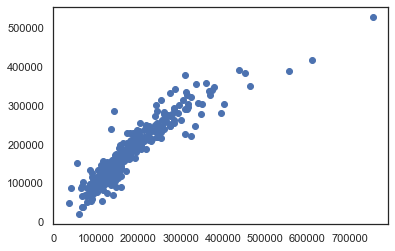

In [ ]:
pred = lin_reg.predict(X_test)
plt.scatter(y_test, pred)

### Making Predictions:-
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data.
In the case that model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable.
We can use these predictions to gain information about data where the value of the target variable is unknown.

In [ ]:
#compute the MAE,MSE,RMSE,R2 FOR PREDICTION VALUE
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)
print_evaluate(y_test, test_pred)
print_evaluate(y_train, train_pred)

MAE: 21603.43674249134
MSE: 1101213542.141315
RMSE: 33184.53769666401
R2 Square 0.8428030035629077
__________________________________
MAE: 18852.064510642653
MSE: 929405350.3411313
RMSE: 30486.150139713136
R2 Square 0.8469218892137595
__________________________________


## R2 Score is 84% for the housing price prediction

Implementation:- Define a model
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. 
This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. 
For this project,we will be calculating the coefficient of determination, R2, to quantify the model's performance.
The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1 ,which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

## Feature engineering 

In [ ]:
#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1)
scaled_data
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
#converting data back to pandas dataframe
MyData_scaled = pd.DataFrame(scaled_data)
MyData_scaled.columns = df1.columns

In [ ]:
features = [ 'MSSubClass',  'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','Exterior1st',
            'Exterior2nd','BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold']
response = ['SalePrice']
X=MyData_scaled[features]
y=MyData_scaled[response]

In [ ]:
#Dividing data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

#Importing neccesary packages
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
for col in X_train:
    X_train[col] = X_train[col].astype('int64')

for col in y_train:
    y_train[col] = y_train[col].astype('int64') 
    
for col in y_test:
    y_test[col] = y_test[col].astype('int64') 
for col in X_test:
    X_test[col]= X_test[col].astype('int64')

In [ ]:
#Fitting linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print('Logistic Regression accuracy :',format(model.score(X_test,y_test)))

Logistic Regression accuracy : 1.0


## With the features selected Sales price with the logistic Regerssion shows 100%